# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Iwan Kurniawan
- **Email:** m010d4ky2363@bangkit.academy
- **ID Dicoding:** Iwan Kurniawan

## Menentukan Pertanyaan Bisnis

- Apa 3 Produk yang paling banyak terjual?
- Bagaimana kondisi demografi (kota) pelanggan yang dimiliki?

## Import Semua Packages/Library yang Digunakan

*   pandas==2.2.1
*   matplotlib==3.8.3
*   seaborn==0.13.2
*   streamlit==1.31.1
*   babel==2.14.0




In [1]:
!pip install pandas==2.2.1 matplotlib==3.8.3 seaborn==0.13.2 streamlit==1.31.1 babel==2.14.0

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from babel.numbers import format_currency

## Data Wrangling

### Gathering Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [5]:
# Base Raw URL for the datasets
base_raw_url = "https://raw.githubusercontent.com/belajarcarabelajar/submission/main/data/"

# List of dataset names (without '.csv')
dataset_names = [
    'product_category_name_translation',
    'olist_sellers_dataset',
    'olist_products_dataset',
    'olist_orders_dataset',
    'olist_order_reviews_dataset',
    'olist_order_payments_dataset',
    'olist_order_items_dataset',
    'olist_geolocation_dataset',
    'olist_customers_dataset'
]

# Load datasets into a dictionary using dictionary comprehension
data = {
    name: pd.read_csv(base_raw_url + name + ".csv")
    for name in dataset_names
}

### Assessing Data

In [6]:
data['product_category_name_translation'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [7]:
data['olist_sellers_dataset'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [8]:
data['olist_products_dataset'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [9]:
data['olist_orders_dataset'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
data['olist_order_reviews_dataset'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [11]:
data['olist_order_payments_dataset'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [12]:
data['olist_order_items_dataset'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [13]:
data['olist_geolocation_dataset'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [14]:
data['olist_customers_dataset'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


## Karena tujuan analisis data hanya untuk mencari:
- Apa 3 Produk yang paling banyak terjual? Bagaimana persentasenya?
- Bagaimana kondisi demografi pelanggan yang dimiliki?

maka, dataset yang disediakan terbatas pada data berikut,

## Menilai Tabel olist_customers_dataset

In [15]:
# Access the DataFrame inside the 'data' dictionary
olist_customers_df = data['olist_customers_dataset']

# Now get information about the DataFrame
olist_customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [16]:
olist_customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [17]:
print("Jumlah duplikasi: ", olist_customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [18]:
olist_customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [19]:
olist_customers_df.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

## Menilai Tabel olist_kategori

In [20]:
# Assuming you have a DataFrame named 'product_category_name_translation' within the 'data' dictionary
product_category_name_translation = data['product_category_name_translation']

# Get information about the DataFrame
product_category_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [21]:
# Cek Duplikasi data
print('jumlah duplikasi data :',product_category_name_translation.duplicated().sum())

jumlah duplikasi data : 0


## Menilai Tabel olist_orders_item_dataset

In [22]:
# Access the DataFrame inside the 'data' dictionary
olist_order_items_df = data['olist_order_items_dataset']

# Now get information about the DataFrame
olist_order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [23]:
olist_order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [24]:
print("Jumlah duplikasi: ", olist_order_items_df.duplicated().sum())

Jumlah duplikasi:  0


## Menilai Tabel olist_orders_dataset

In [25]:
# Access the DataFrame inside the 'data' dictionary
olist_orders_df = data['olist_orders_dataset']

# Now get information about the DataFrame
olist_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [26]:
olist_orders_df.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [27]:
print("Jumlah duplikasi: ",olist_orders_df.duplicated().sum())
olist_orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [28]:
olist_orders_df.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

## Menilai Tabel olist_products_dataset

In [29]:
# Access the DataFrame inside the 'data' dictionary
olist_products_df = data['olist_products_dataset']

# Now get information about the DataFrame
olist_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [30]:
olist_products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [31]:
print("Jumlah duplikasi: ",olist_products_df.duplicated().sum())
olist_products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


## Menilai Tabel olist_geolocation_dataset

In [32]:
# Access the DataFrame inside the 'data' dictionary
olist_geolocation_df = data['olist_geolocation_dataset']

# Now get information about the DataFrame
olist_geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [33]:
olist_geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

### Cleaning Data

### Cleaning Tabel produk

In [34]:
olist_products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [35]:
# menangani missing values dengan method ffill (mengisi nilai yang hilang dengan nilai dari baris sebelumnya)
olist_products_df['product_weight_g'].fillna(method='ffill', inplace=True)
olist_products_df['product_length_cm'].fillna(method='ffill', inplace=True)
olist_products_df['product_height_cm'].fillna(method='ffill', inplace=True)
olist_products_df['product_width_cm'].fillna(method='ffill', inplace=True)
olist_products_df['product_name_lenght'].fillna(method='ffill', inplace=True)
olist_products_df['product_description_lenght'].fillna(method='ffill', inplace=True)
olist_products_df['product_photos_qty'].fillna(method='ffill', inplace=True)

<ipython-input-35-2aab1ba3ee23>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  olist_products_df['product_weight_g'].fillna(method='ffill', inplace=True)
<ipython-input-35-2aab1ba3ee23>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  olist_products_df['product_weight_g'].fillna(method='ffill', inplace=True)
<ipython-input-35-2aab1ba3ee23>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained as

In [36]:
mode_category = olist_products_df['product_category_name'].mode()[0]
olist_products_df['product_category_name'].fillna(value=mode_category, inplace=True)

<ipython-input-36-f356125883fd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  olist_products_df['product_category_name'].fillna(value=mode_category, inplace=True)


In [37]:
olist_products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

### Cleaning Tabel orders

In [38]:
olist_orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [39]:
olist_orders_df.dropna(axis=0, inplace=True)

In [40]:
olist_orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [41]:
olist_orders_df.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [42]:
olist_orders_df['order_purchase_timestamp'] = pd.to_datetime(olist_orders_df['order_purchase_timestamp'])
olist_orders_df['order_approved_at'] = pd.to_datetime(olist_orders_df['order_approved_at'])
olist_orders_df['order_delivered_carrier_date'] = pd.to_datetime(olist_orders_df['order_delivered_carrier_date'])
olist_orders_df['order_delivered_customer_date'] = pd.to_datetime(olist_orders_df['order_delivered_customer_date'])
olist_orders_df['order_estimated_delivery_date'] = pd.to_datetime(olist_orders_df['order_estimated_delivery_date'])

In [43]:
olist_orders_df.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

### Cleaning Tabel order items

In [44]:
olist_order_items_df['shipping_limit_date'] = pd.to_datetime(olist_order_items_df['shipping_limit_date'])

In [45]:
olist_order_items_df.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

## Exploratory Data Analysis (EDA)

### Explore Tabel produk & order_items

In [46]:
#gabungkan tabel
kategori_info = pd.merge(olist_products_df[['product_id', 'product_category_name']], olist_order_items_df[['order_id','order_item_id','product_id','shipping_limit_date']], on='product_id', how='inner')

In [47]:
kategori_info

,product_id,product_category_name,order_id,order_item_id,shipping_limit_date
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,1,2018-04-30 17:33:54
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,5236307716393b7114b53ee991f36956,1,2018-02-06 19:11:15
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,01f66e58769f84129811d43eefd187fb,1,2018-07-11 21:30:20
3,cef67bcfe19066a932b7673e239eb23d,bebes,143d00a4f2dde4e0364ee1821577adb3,1,2018-08-07 09:10:13
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,86cafb8794cb99a9b1b77fc8e48fbbbb,1,2018-04-17 01:30:23
...,...,...,...,...,...
112645,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,59e88b7d3675e89aceaf86f372d3bc9a,2,2018-01-10 03:32:09
112646,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,6e4465d771f02e4fe335225de3c6c043,1,2018-03-14 02:30:48
112647,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,6e4465d771f02e4fe335225de3c6c043,2,2018-03-14 02:30:48
112648,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,6e4465d771f02e4fe335225de3c6c043,3,2018-03-14 02:30:48


Explore Tabel kategori_info & df_kategori

In [48]:
kategori_info = pd.merge(kategori_info,product_category_name_translation[['product_category_name', 'product_category_name_english']], on='product_category_name', how='inner')

In [49]:
kategori_info.head()

,product_id,product_category_name,order_id,order_item_id,shipping_limit_date,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,1,2018-04-30 17:33:54,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,5236307716393b7114b53ee991f36956,1,2018-02-06 19:11:15,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,01f66e58769f84129811d43eefd187fb,1,2018-07-11 21:30:20,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,143d00a4f2dde4e0364ee1821577adb3,1,2018-08-07 09:10:13,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,86cafb8794cb99a9b1b77fc8e48fbbbb,1,2018-04-17 01:30:23,housewares


In [50]:
# Menghapus kategori yang bahasa brazil
kategori_info = kategori_info.drop('product_category_name',axis=1)

# Mengubah nama kolom kategori dan order item id
kategori_info = kategori_info.rename(columns={'product_category_name_english': 'product_category'})
kategori_info = kategori_info.rename(columns={'order_item_id': 'jumlah_terjual'})

kategori_info.head()

,product_id,order_id,jumlah_terjual,shipping_limit_date,product_category
0,1e9e8ef04dbcff4541ed26657ea517e5,e17e4f88e31525f7deef66779844ddce,1,2018-04-30 17:33:54,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,5236307716393b7114b53ee991f36956,1,2018-02-06 19:11:15,art
2,96bd76ec8810374ed1b65e291975717f,01f66e58769f84129811d43eefd187fb,1,2018-07-11 21:30:20,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,143d00a4f2dde4e0364ee1821577adb3,1,2018-08-07 09:10:13,baby
4,9dc1a7de274444849c219cff195d0b71,86cafb8794cb99a9b1b77fc8e48fbbbb,1,2018-04-17 01:30:23,housewares


In [51]:
count_kategori = kategori_info['product_category'].value_counts()
count_kategori

product_category
bed_bath_table               12718
health_beauty                 9670
sports_leisure                8641
furniture_decor               8334
computers_accessories         7827
                             ...  
arts_and_craftmanship           24
la_cuisine                      14
cds_dvds_musicals               14
fashion_childrens_clothes        8
security_and_services            2
Name: count, Length: 71, dtype: int64

In [52]:
# Mencari 5 kategori teratas
kategori_head = count_kategori.head(5)
pd.DataFrame(kategori_head)

,count
product_category,
bed_bath_table,12718
health_beauty,9670
sports_leisure,8641
furniture_decor,8334
computers_accessories,7827


In [53]:
# Mencari 5 kategori terbawah
kategori_tail = count_kategori.tail(5)
pd.DataFrame(kategori_tail)

,count
product_category,
arts_and_craftmanship,24
la_cuisine,14
cds_dvds_musicals,14
fashion_childrens_clothes,8
security_and_services,2


## Mencari demografi dengan pembeli yang paling banyak order

In [54]:
customer_info = pd.merge(
    olist_customers_df[['customer_id', 'customer_unique_id','customer_city']],
    olist_orders_df[['order_id', 'customer_id', 'order_status']],
    on='customer_id',
    how='inner'
)
customer_info.head()

,customer_id,customer_unique_id,customer_city,order_id,order_status
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,00e7ee1b050b8499577073aeb2a297a1,delivered
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,29150127e6685892b6eab3eec79f59c7,delivered
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,951670f92359f4fe4a63112aa7306eba,delivered
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered


In [55]:
customer_city = customer_info['customer_city'].value_counts().head(5)
customer_city

customer_city
sao paulo         15044
rio de janeiro     6603
belo horizonte     2697
brasilia           2071
curitiba           1489
Name: count, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-56-9e2c9f02d8d6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')


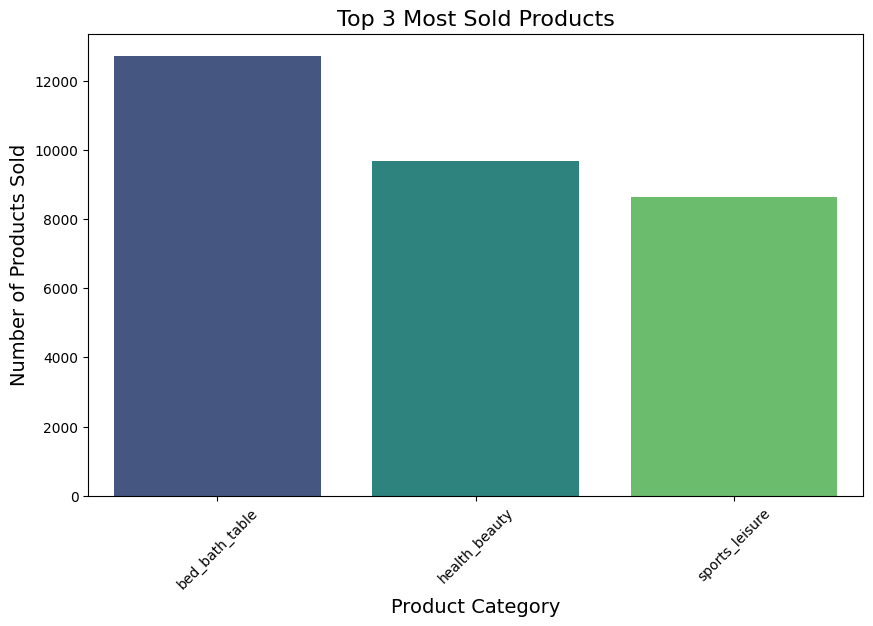

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for top 3 most sold products
top_products = kategori_info['product_category'].value_counts().head(3)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')
plt.title('Top 3 Most Sold Products', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Number of Products Sold', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2:

<ipython-input-57-9087c3bab2c4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='coolwarm')


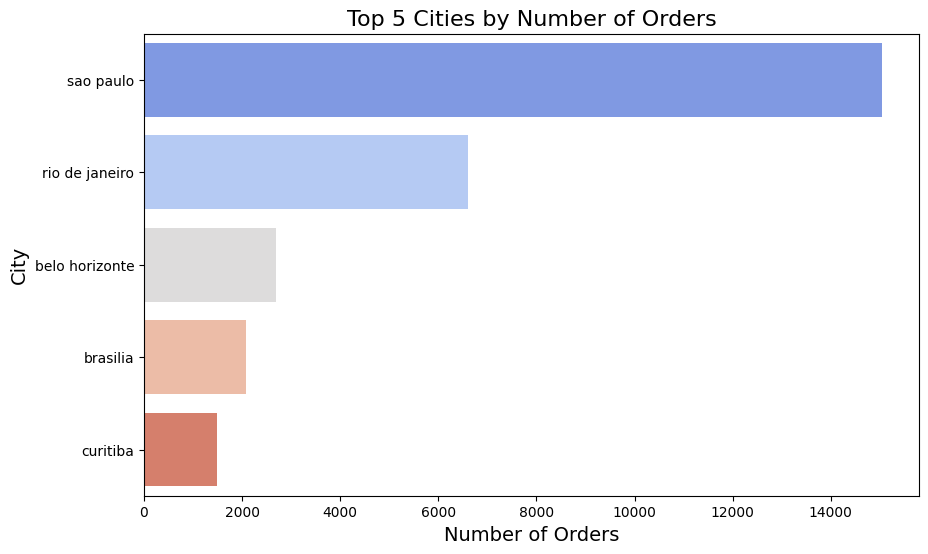

In [57]:
# Data for cities with the highest number of orders
top_cities = customer_info['customer_city'].value_counts().head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='coolwarm')
plt.title('Top 5 Cities by Number of Orders', fontsize=16)
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.show()

## Conclusion

### Apa 3 Produk yang paling banyak terjual?

Berdasarkan Visualisasi 3 Produk Teratas yang Paling Banyak Dijual. Ini menunjukkan kategori produk yang paling populer di kalangan pelanggan di platform e-commerce yakni **bed_bath_table** diurutan pertama, diikuti oleh **healthy_beauty** pada urutan kedua, dan **sports_leisure** di urutan ketiga.

### Bagaimana kondisi demografi (kota) pelanggan yang dimiliki?

Berdasarkan grafik visualisasi ini, menunjukkan bahwa demografi (Kota) dengan jumlah pesanan tertinggi berasal dari kota sao paulo ** **bold text**(1); rio de janiero** (2); dan **bello herizonte **(3). Sedangkan urutan keempat dan kelima masing-masing diraih oleh **brasilia** (4) dan **curitiba** (5). Data ini menunjukkan urutan paling tinggi yang mengindikasikan kota tersebut sebagai pasar utama untuk platform e-commerce. Kota-kota di bawahnya mewakili pasar yang semakin kecil berdasarkan volume pesanan.

## Persiapan unggah file CSV

In [58]:
# Menggabungkan tabel kategori dan order items
kategori_info = pd.merge(olist_products_df[['product_id', 'product_category_name']], olist_order_items_df[['order_id','order_item_id','product_id','shipping_limit_date']], on='product_id', how='inner')

In [59]:
# Menggabungkan tabel kategori_info dan df_kategori
kategori_info = pd.merge(kategori_info,product_category_name_translation[['product_category_name', 'product_category_name_english']], on='product_category_name', how='inner')

In [60]:
# Menghapus kategori yang bahasa brazil
kategori_info = kategori_info.drop('product_category_name',axis=1)

In [61]:
# Mengubah nama kolom kategori dan order item id
kategori_info = kategori_info.rename(columns={'product_category_name_english': 'product_category'})
kategori_info = kategori_info.rename(columns={'order_item_id': 'jumlah_terjual'})

In [62]:
# Menggabungkan tabel kategori_info dan customer_info
all_df = pd.merge(kategori_info, customer_info[['order_id', 'customer_city']], on='order_id', how='inner')

# Menampilkan data
print(all_df.head())

                         product_id                          order_id  \
0  1e9e8ef04dbcff4541ed26657ea517e5  e17e4f88e31525f7deef66779844ddce   
1  3aa071139cb16b67ca9e5dea641aaa2f  5236307716393b7114b53ee991f36956   
2  96bd76ec8810374ed1b65e291975717f  01f66e58769f84129811d43eefd187fb   
3  cef67bcfe19066a932b7673e239eb23d  143d00a4f2dde4e0364ee1821577adb3   
4  9dc1a7de274444849c219cff195d0b71  86cafb8794cb99a9b1b77fc8e48fbbbb   

   jumlah_terjual shipping_limit_date product_category   customer_city  
0               1 2018-04-30 17:33:54        perfumery      mogi-guacu  
1               1 2018-02-06 19:11:15              art  rio de janeiro  
2               1 2018-07-11 21:30:20   sports_leisure       sao paulo  
3               1 2018-08-07 09:10:13             baby       sao paulo  
4               1 2018-04-17 01:30:23       housewares       sao paulo  


In [63]:
# Menentukan kolom yang ingin ditampilkan
kolom_analisis = ['product_category', 'customer_city', 'jumlah_terjual']

# Menampilkan data yang dianalisis
all_df = all_df[kolom_analisis]

# Menampilkan data yang dianalisis
print(all_df.head())

  product_category   customer_city  jumlah_terjual
0        perfumery      mogi-guacu               1
1              art  rio de janeiro               1
2   sports_leisure       sao paulo               1
3             baby       sao paulo               1
4       housewares       sao paulo               1


In [64]:
all_df.to_csv("all_data.csv", index=False)